# Análisis de Datos del Cáncer de Mama - Modelos Supervisados y No Supervisados

## Objetivo
En este análisis utilizaremos el dataset de cáncer de mama para aplicar y evaluar diferentes algoritmos de aprendizaje, tanto supervisados como no supervisados. El objetivo es identificar los mejores modelos para clasificar los datos de manera precisa y obtener insights útiles.


In [47]:
# Importación de librerías estándar
import os
import sys

# Importación de librerías de terceros
import pandas as pd  # Análisis y manipulación de datos
import numpy as np  # Operaciones numéricas
import seaborn as sns  # Visualización de datos
import matplotlib.pyplot as plt  # Visualización de datos
from IPython.display import display, HTML  # Visualización en Jupyter Notebooks

# Importación de librerías específicas de sklearn
from sklearn.model_selection import train_test_split  # División de datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler  # Escalado de datos

# Configuración del entorno
#project_path = r'ADJUNTAR LA RUTA DE TU PROYECTO:'
src_path = os.path.join(project_path, 'src')

if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Importación de módulos internos del proyecto
from src.data_preprocessing import load_breast_cancer_data, preprocess_data
from src.models import train_all_models, save_model
from src.evaluation import evaluate_all_models, plot_confusion_matrix
from src.unsupervised_analysis import apply_kmeans, plot_clusters
from src.feature_engineering import add_custom_features

## Importación de Librerías
En esta sección, importamos las librerías necesarias para el análisis, incluyendo pandas, numpy, y módulos de scikit-learn. También se importan las funciones personalizadas desde el directorio `src` para el procesamiento de datos, modelos y análisis.


In [48]:
# Definir la ruta al archivo de datos
file_path = os.path.join(project_path, 'data', 'wdbc.data')

def load_and_process_data(file_path):
    df, y = load_breast_cancer_data(file_path)
    first_rows_df = pd.DataFrame(df.head().T.values, index=df.columns, columns=[f'Fila {i+1}' for i in range(df.head().shape[0])])
    dtypes_df = pd.DataFrame(df.dtypes.astype(str), columns=['Tipos de Datos'])
    return first_rows_df, dtypes_df

def display_dataframes(first_rows_df, dtypes_df):
    display(HTML(f"""
    <div style="border:1px solid black; padding:10px; margin:10px;">
        <h3>Primeras filas del dataset</h3>
        {first_rows_df.to_html()}
    </div>
    <div style="border:1px solid black; padding:10px; margin:10px;">
        <h3>Tipos de datos</h3>
        {dtypes_df.to_html()}
    </div>
    """))

first_rows_df, dtypes_df = load_and_process_data(file_path)
display_dataframes(first_rows_df, dtypes_df)

,Fila 1,Fila 2,Fila 3,Fila 4,Fila 5
Radius_mean,17.990000,20.570000,19.690000,11.420000,20.290000
Texture_mean,10.380000,17.770000,21.250000,20.380000,14.340000
Perimeter_mean,122.800000,132.900000,130.000000,77.580000,135.100000
Area_mean,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
Smoothness_mean,0.118400,0.084740,0.109600,0.142500,0.100300
Compactness_mean,0.277600,0.078640,0.159900,0.283900,0.132800
Concavity_mean,0.300100,0.086900,0.197400,0.241400,0.198000
Concave_points_mean,0.147100,0.070170,0.127900,0.105200,0.104300
Symmetry_mean,0.241900,0.181200,0.206900,0.259700,0.180900
Fractal_dimension_mean,0.078710,0.056670,0.059990,0.097440,0.058830


## Carga y Exploración de Datos
Cargamos el dataset de cáncer de mama y realizamos una exploración básica para entender sus características.


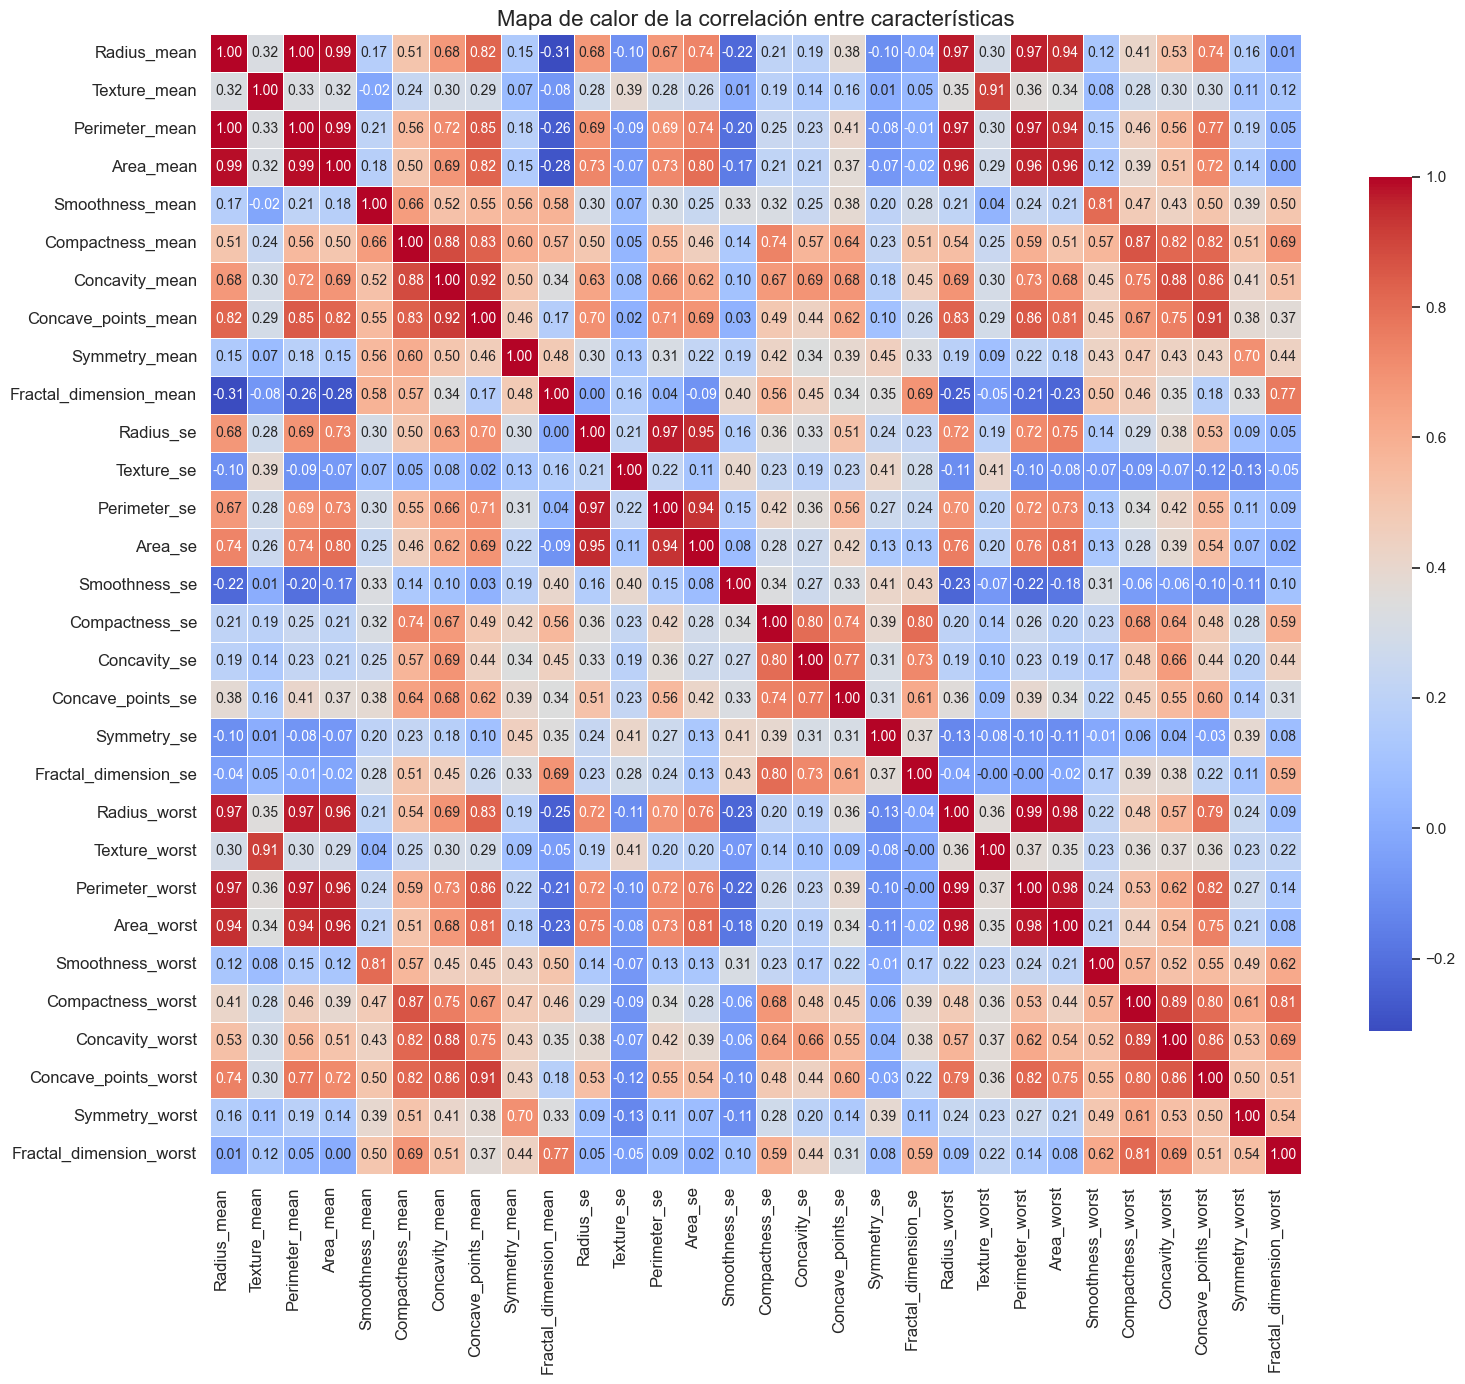

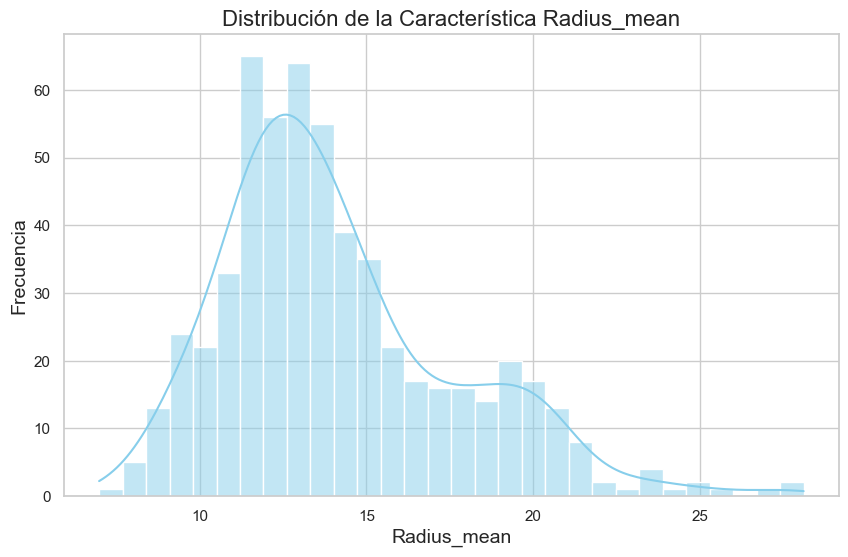

In [35]:
# Configuración general de estilo
sns.set(style="whitegrid")

# Mapa de calor de correlación
plt.figure(figsize=(16, 14))
heatmap = sns.heatmap(
    df.corr(), 
    annot=True, 
    annot_kws={"size": 10},  # Tamaño de las anotaciones
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=0.5, 
    linecolor='white', 
    cbar_kws={"shrink": 0.75}
)
heatmap.set_title('Mapa de calor de la correlación entre características', fontsize=16)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Ajustar el diseño para que no se corten las etiquetas
plt.show()

# Histograma de una característica relevante
plt.figure(figsize=(10, 6))
histplot = sns.histplot(df['Radius_mean'], kde=True, color='skyblue', bins=30)
histplot.set_title('Distribución de la Característica Radius_mean', fontsize=16)
histplot.set_xlabel('Radius_mean', fontsize=14)
histplot.set_ylabel('Frecuencia', fontsize=14)
plt.show()

## Análisis Exploratorio de Datos (EDA)
En esta sección, exploramos visualmente el dataset para identificar relaciones entre las características y posibles patrones.


In [9]:
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Preprocesamiento de los datos (aplicar solo a X_train y X_test)
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)


## Preprocesamiento de Datos
En esta sección, aplicamos técnicas de estandarización para preparar los datos. Utilizamos `StandardScaler` para escalar las características y dividir el conjunto de datos en entrenamiento y prueba.


In [10]:
# Aplicar Feature Engineering
X_train = add_custom_features(X_train)
X_test = add_custom_features(X_test)


## Ingeniería de Características
Aplicamos diferentes técnicas para agregar características personalizadas que pueden mejorar el rendimiento de nuestros modelos.


## División de Datos en Entrenamiento y Prueba
Los datos fueron divididos en un 70% para entrenamiento y un 30% para prueba. Esta división permite evaluar el rendimiento de los modelos en datos no vistos.


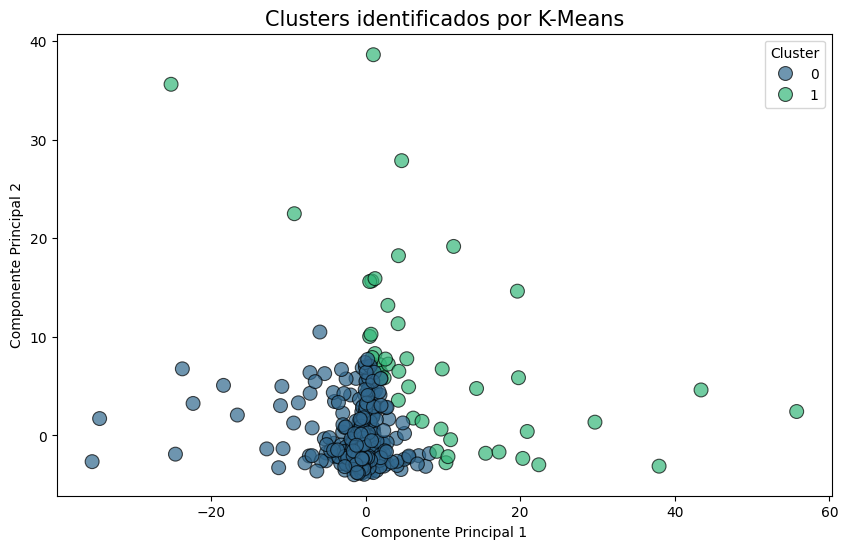

In [12]:
# Aplicar K-Means Clustering
clusters, X_pca = apply_kmeans(X_train)

# Visualizar los clusters
plot_clusters(X_pca, clusters)


## Análisis No Supervisado - K-Means Clustering
Aplicamos K-Means Clustering para identificar posibles agrupaciones en los datos. La visualización muestra la distribución de los clusters en el espacio de las componentes principales.


In [13]:
# Entrenamiento de los modelos
models = train_all_models(X_train, y_train)


## Entrenamiento de Modelos Supervisados
Entrenamos tres modelos supervisados: Naive Bayes, LDA y Regresión Logística, para clasificar los datos de cáncer de mama.


In [46]:
# Evaluación de los modelos
evaluation_results = evaluate_all_models(models, X_test, y_test)

# Crear un DataFrame para los resultados de evaluación
results_df = pd.DataFrame({
    'Model': list(evaluation_results.keys()),
    'Accuracy': [results['accuracy'] for results in evaluation_results.values()],
    'Classification Report': [results['classification_report'] for results in evaluation_results.values()]
})

# Mostrar los informes de clasificación en cuadros
for index, row in results_df.iterrows():
    display(HTML(f"""
    <div style="border:1px solid black; padding:10px; margin:10px;">
        <h3>--- {row['Model']} ---</h3>
        <p><strong>Accuracy:</strong> {row['Accuracy']}</p>
        <pre>{row['Classification Report']}</pre>
    </div>
    """))

## Evaluación de Modelos
Evaluamos el rendimiento de cada modelo utilizando métricas como precisión, recall y F1-score. Las matrices de confusión permiten visualizar los aciertos y errores en la clasificación.


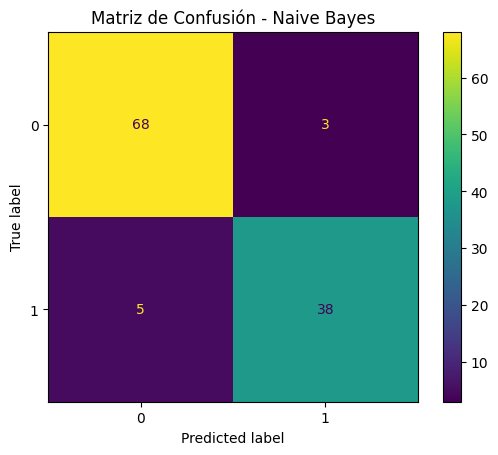

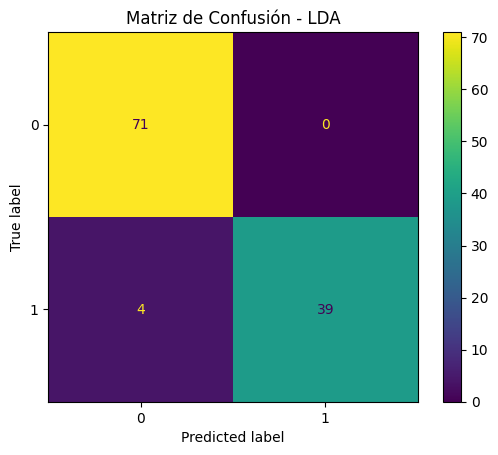

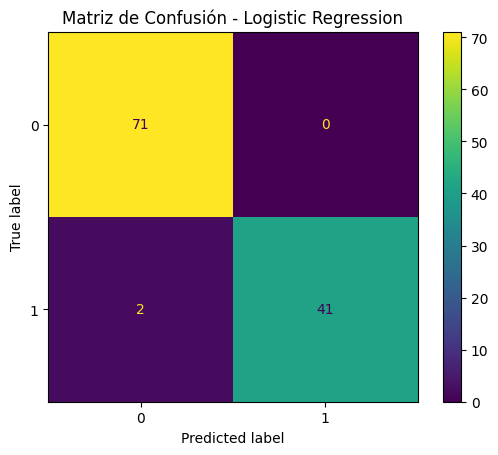

In [15]:
# Graficar matrices de confusión
for model_name, model in models.items():
    plot_confusion_matrix(model, X_test, y_test, model_name)


## Visualización de las Matrices de Confusión
Las matrices de confusión muestran el desempeño de cada modelo en la clasificación, indicando el número de aciertos y errores.


## Conclusiones y Próximos Pasos
En este análisis, se han aplicado modelos supervisados y no supervisados para analizar el dataset de cáncer de mama. Los resultados indican que la ingeniería de características y el escalado de datos mejoraron el rendimiento de los modelos. 

### Próximos Pasos
- **Optimización de Hiperparámetros**: Utilizar técnicas como GridSearchCV para encontrar los mejores parámetros para cada modelo.
- **Explorar otros algoritmos**: Probar algoritmos más complejos como Random Forest y Support Vector Machines.
- **Validación Cruzada**: Implementar validación cruzada para evaluar el rendimiento de los modelos.
